In [1]:
# Defines
#=================================================#
IS_TRAIN_NOT_TEST = True

ENV_LOCAL_MACHINE   = 1
ENV_GOOGLE_COLLABS  = 2
ENV_KAGGLE          = 3
ENVIRONMENT = ENV_LOCAL_MACHINE

#=================================================#
RANDOM_SEED = 214
OVERSAMPLING_RATIO = 0.3
UNDERSAMPLING_RATIO = 0.8
N_JOBS = -1

#=================================================#
PATH_INPUT              = "dataset/creditcard/"
PATH_OUTPUT             = "outputs/creditcard/"

CSV_DATASET_RAW                     = "creditcard.csv"
CSV_DATASET_TRAIN                   = "dataset_train.csv"
CSV_DATASET_TEST                    = "dataset_test.csv"
CSV_DATASET_TRAIN_TRANSFORMED       = "dataset_train_t.csv"
CSV_DATASET_TEST_TRANSFORMED        = "dataset_test_t.csv"
CSV_DATASET_VAL_TRANSFORMED         = "dataset_val_t.csv"

CSV_DATASET_BALANCED_RUS_TRAIN      = "dataset_train_t_b_rus.csv"
CSV_DATASET_BALANCED_NM_TRAIN       = "dataset_train_t_b_nm.csv"
CSV_DATASET_BALANCED_SMOTE_TRAIN    = "dataset_train_t_b_smote.csv"
CSV_DATASET_BALANCED_ADASYN_TRAIN   = "dataset_train_t_b_adasyn.csv"
CSV_DATASET_BALANCED_TOMEK_TRAIN    = "dataset_train_t_b_tomek.csv"
CSV_DATASET_BALANCED_ENN_TRAIN      = "dataset_train_t_b_enn.csv"

CSV_DATASET_BALANCED_NM80_TOMEK30_TRAIN      = "dataset_train_t_b_nm80_tomek30.csv"
CSV_DATASET_BALANCED_NM65_TOMEK30_TRAIN      = "dataset_train_t_b_nm65_tomek30.csv"
CSV_DATASET_BALANCED_NM80_TOMEK50_TRAIN      = "dataset_train_t_b_nm80_tomek50.csv"
CSV_DATASET_BALANCED_NM90_TOMEK15_TRAIN      = "dataset_train_t_b_nm90_tomek15.csv"

CSV_DATASET_BALANCED_NM90_ENN15_TRAIN = "dataset_balanced_train_nm90_enn15.csv"
CSV_DATASET_BALANCED_NM90_ENN30_TRAIN = "dataset_balanced_train_nm90_enn30.csv"
CSV_DATASET_BALANCED_NM80_ENN30_TRAIN = "dataset_balanced_train_nm80_enn30.csv"

if ENVIRONMENT == ENV_LOCAL_MACHINE:
    PATH_DATASET_BASE  = "../"
if ENVIRONMENT == ENV_GOOGLE_COLLABS:
    PATH_DATASET_BASE  = "drive/MyDrive/UTN_Finales/[F] Aprendizaje Automatico/Repositorio/"

FEATURE_TARGET = "Class"

In [3]:
import pandas as pd
import numpy as np

from collections import Counter

%pip install imblearn

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import log_loss, roc_auc_score, roc_curve, average_precision_score

import matplotlib.pyplot as plt



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<>:46: SyntaxWarning: invalid escape sequence '\P'
<>:46: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Kevin\AppData\Local\Temp\ipykernel_3732\1367090026.py:46: SyntaxWarning: invalid escape sequence '\P'
  axs[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}\PR = {avg_precision:.3f}')


Train Dataset: dataset_val_t.csv
Log Loss: 0.229
PR: 0.662
AUC-ROC: 0.933
Train Dataset: dataset_train_t_b_rus.csv
Log Loss: 0.174
PR: 0.745
AUC-ROC: 0.938
Train Dataset: dataset_train_t_b_nm.csv
Log Loss: 0.174
PR: 0.745
AUC-ROC: 0.938
Train Dataset: dataset_train_t_b_smote.csv
Log Loss: 0.336
PR: 0.746
AUC-ROC: 0.964
Train Dataset: dataset_train_t_b_adasyn.csv
Log Loss: 0.333
PR: 0.733
AUC-ROC: 0.964
Train Dataset: dataset_train_t_b_tomek.csv
Log Loss: 0.349
PR: 0.682
AUC-ROC: 0.963
Train Dataset: dataset_train_t_b_enn.csv
Log Loss: 0.354
PR: 0.650
AUC-ROC: 0.963


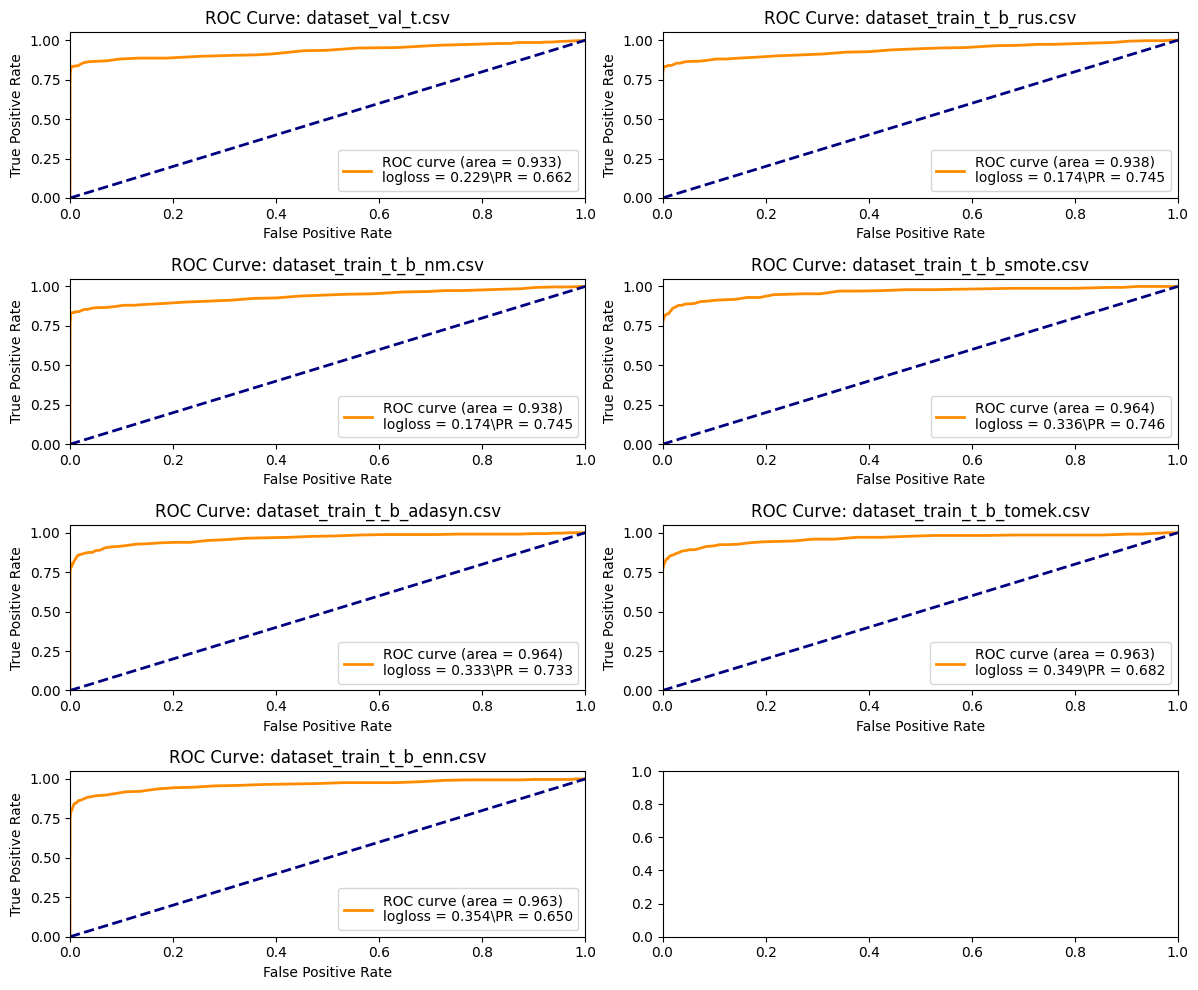

In [4]:
dataset_list = [
    CSV_DATASET_VAL_TRANSFORMED,
    CSV_DATASET_BALANCED_RUS_TRAIN,
    CSV_DATASET_BALANCED_NM_TRAIN,
    CSV_DATASET_BALANCED_SMOTE_TRAIN ,
    CSV_DATASET_BALANCED_ADASYN_TRAIN,
    CSV_DATASET_BALANCED_TOMEK_TRAIN,
    CSV_DATASET_BALANCED_ENN_TRAIN
]

dataset_val = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST_TRANSFORMED)
X_val = dataset_val.drop(FEATURE_TARGET, axis=1)
y_val = dataset_val[FEATURE_TARGET]

# Determine the number of rows and columns for subplots
num_cols = len(dataset_list)
num_rows = int(np.ceil(num_cols / 2))  # Adjust as needed for your dataset

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 2.5 * num_rows))

# Flatten the axs array in case num_rows = 1
axs = axs.flatten()

for i in range(len(dataset_list)):
    print(f"Train Dataset: {dataset_list[i]}")
    dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+dataset_list[i])
    X_train = dataset.drop(FEATURE_TARGET, axis=1)
    y_train = dataset[FEATURE_TARGET]

    model = RandomForestClassifier(random_state=RANDOM_SEED)
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_val)[:, 1]

    logloss = log_loss(y_val, y_pred_proba)
    print(f"Log Loss: {logloss:.3f}")

    avg_precision = average_precision_score(y_val, y_pred_proba)
    print(f"PR: {avg_precision:.3f}")

    roc_auc = roc_auc_score(y_val, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    print(f"AUC-ROC: {roc_auc:.3f}")

    axs[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}\nPR = {avg_precision:.3f}')
    axs[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC Curve: {dataset_list[i]}')
    axs[i].legend(loc="lower right")

# Adjust layout and display
plt.tight_layout()
plt.show()

Train Dataset: dataset_train_t_b_nm80_tomek30.csv
Log Loss: 0.322
PR: 0.655
AUC-ROC: 0.969
Train Dataset: dataset_train_t_b_nm65_tomek30.csv
Log Loss: 0.394
PR: 0.650
AUC-ROC: 0.967
Train Dataset: dataset_train_t_b_nm80_tomek50.csv
Log Loss: 0.322
PR: 0.655
AUC-ROC: 0.969
Train Dataset: dataset_train_t_b_nm90_tomek15.csv
Log Loss: 0.379
PR: 0.648
AUC-ROC: 0.964


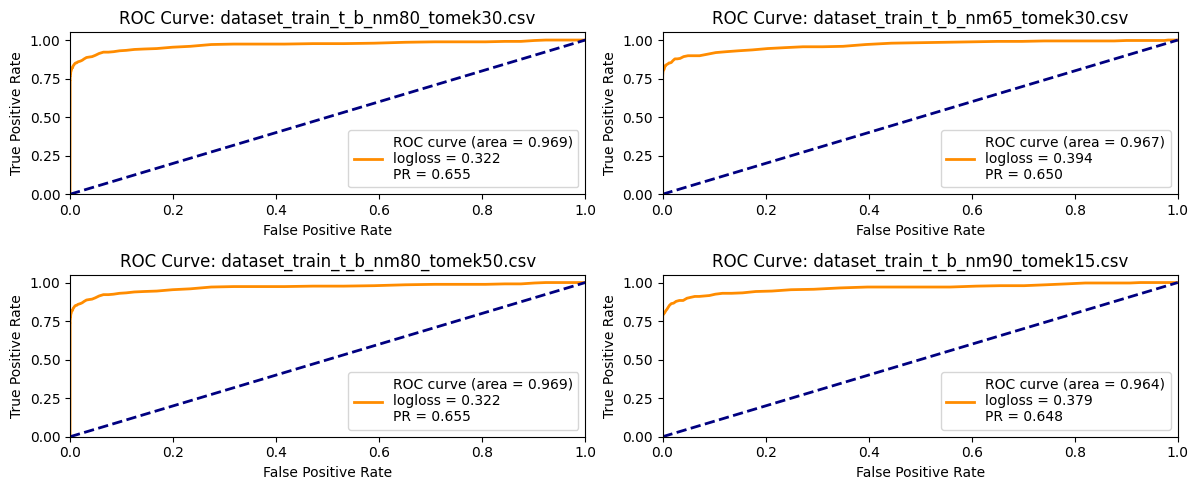

In [5]:
dataset_list = [
    CSV_DATASET_BALANCED_NM80_TOMEK30_TRAIN,
    CSV_DATASET_BALANCED_NM65_TOMEK30_TRAIN,
    CSV_DATASET_BALANCED_NM80_TOMEK50_TRAIN,
    CSV_DATASET_BALANCED_NM90_TOMEK15_TRAIN
]

dataset_val = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST_TRANSFORMED)
X_val = dataset_val.drop(FEATURE_TARGET, axis=1)
y_val = dataset_val[FEATURE_TARGET]

# Determine the number of rows and columns for subplots
num_cols = len(dataset_list)
num_rows = int(np.ceil(num_cols / 2))  # Adjust as needed for your dataset

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 2.5 * num_rows))

# Flatten the axs array in case num_rows = 1
axs = axs.flatten()

for i in range(len(dataset_list)):
    print(f"Train Dataset: {dataset_list[i]}")
    dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+dataset_list[i])
    X_train = dataset.drop(FEATURE_TARGET, axis=1)
    y_train = dataset[FEATURE_TARGET]

    model = RandomForestClassifier(random_state=RANDOM_SEED)
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_val)[:, 1]

    logloss = log_loss(y_val, y_pred_proba)
    print(f"Log Loss: {logloss:.3f}")

    avg_precision = average_precision_score(y_val, y_pred_proba)
    print(f"PR: {avg_precision:.3f}")

    roc_auc = roc_auc_score(y_val, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    print(f"AUC-ROC: {roc_auc:.3f}")

    axs[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}\nPR = {avg_precision:.3f}')
    axs[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC Curve: {dataset_list[i]}')
    axs[i].legend(loc="lower right")

# Adjust layout and display
plt.tight_layout()
plt.show()

Train Dataset: dataset_balanced_train_nm90_enn15.csv
Log Loss: 0.279
PR: 0.643
AUC-ROC: 0.966
Train Dataset: dataset_balanced_train_nm90_enn30.csv
Log Loss: 0.279
PR: 0.643
AUC-ROC: 0.966
Train Dataset: dataset_balanced_train_nm80_enn30.csv
Log Loss: 0.275
PR: 0.649
AUC-ROC: 0.961


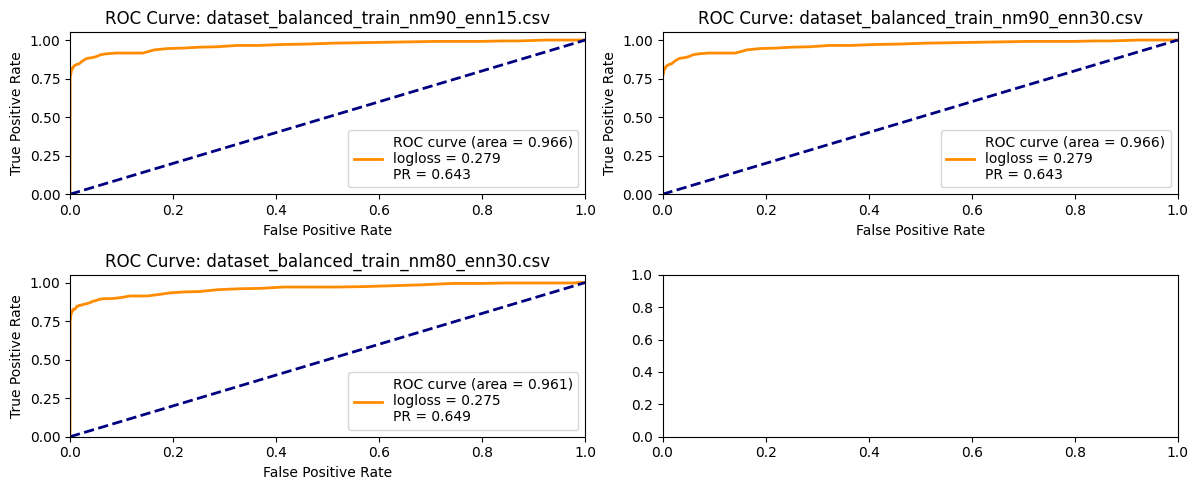

In [6]:
dataset_list = [
    CSV_DATASET_BALANCED_NM90_ENN15_TRAIN,
    CSV_DATASET_BALANCED_NM90_ENN30_TRAIN,
    CSV_DATASET_BALANCED_NM80_ENN30_TRAIN
]

dataset_val = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+CSV_DATASET_TEST_TRANSFORMED)
X_val = dataset_val.drop(FEATURE_TARGET, axis=1)
y_val = dataset_val[FEATURE_TARGET]

# Determine the number of rows and columns for subplots
num_cols = len(dataset_list)
num_rows = int(np.ceil(num_cols / 2))  # Adjust as needed for your dataset

# Create subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 2.5 * num_rows))

# Flatten the axs array in case num_rows = 1
axs = axs.flatten()

for i in range(len(dataset_list)):
    print(f"Train Dataset: {dataset_list[i]}")
    dataset = pd.read_csv(PATH_DATASET_BASE+PATH_OUTPUT+dataset_list[i])
    X_train = dataset.drop(FEATURE_TARGET, axis=1)
    y_train = dataset[FEATURE_TARGET]

    model = RandomForestClassifier(random_state=RANDOM_SEED)
    model.fit(X_train, y_train)

    y_pred_proba = model.predict_proba(X_val)[:, 1]

    logloss = log_loss(y_val, y_pred_proba)
    print(f"Log Loss: {logloss:.3f}")

    avg_precision = average_precision_score(y_val, y_pred_proba)
    print(f"PR: {avg_precision:.3f}")

    roc_auc = roc_auc_score(y_val, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    print(f"AUC-ROC: {roc_auc:.3f}")

    axs[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})\nlogloss = {logloss:.3f}\nPR = {avg_precision:.3f}')
    axs[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC Curve: {dataset_list[i]}')
    axs[i].legend(loc="lower right")

# Adjust layout and display
plt.tight_layout()
plt.show()